In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# get data

In [2]:
tsl_dir_adults = '/home/yoel/Documents/sl/data/adults/tsl'
tsl_dir_kids = '/home/yoel/Documents/sl/data/kids/tsl/'
vsl_dir_adults = '/home/yoel/Documents/sl/data/adults/vsl'
vsl_dir_kids = '/home/yoel/Documents/sl/data/kids/vsl'
tsl_data_files_adults = os.listdir(tsl_dir_adults)
tsl_data_files_kids = os.listdir(tsl_dir_kids)
vsl_data_files_adults = os.listdir(vsl_dir_adults)
vsl_data_files_kids = os.listdir(vsl_dir_kids)
print("TSL ADULTS N: {}".format(len(tsl_data_files_adults)))
print("TSL KIDS N: {}".format(len(tsl_data_files_kids)))
print("VSL ADULTS N: {}".format(len(vsl_data_files_adults)))
print("VSL KIDS N: {}".format(len(vsl_data_files_kids)))

TSL ADULTS N: 33
TSL KIDS N: 23
VSL ADULTS N: 36
VSL KIDS N: 22


In [3]:
def add_header(data):
    data_copy = data.copy()
    c1 = [
        'rt','responses','trial_type',
        'trial_index','time_elapsed',
        'internal_node_id','stimulus',
        'key_press','cond','targ','value'
    ]
    c2 = [
        "rt","responses","trial_type",
        "trial_index","time_elapsed",
        "internal_node_id","cond","targ",
        "value","key_press","stimulus"
    ]
    if not pd.isnull(data_copy[10][100]):
        data_copy.columns = data_copy.loc[0]
        data_copy = data_copy.drop(0,0)
        data_copy.index = [x for x in range(data_copy.shape[0])]
    elif not pd.isnull(data_copy[6][100]):
        data_copy.columns = c1
        data_copy
    return data_copy

def read(data):
    return pd.read_csv(data, header=None)

# list of data

In [4]:
vsl_kids = []
for x in vsl_data_files_kids:
    vsl_kids.append(read(os.path.join(vsl_dir_kids, x)))
vsl_adults = []
for x1 in vsl_data_files_adults:
    vsl_adults.append(read(os.path.join(vsl_dir_adults, x1)))
tsl_kids = []
for x2 in tsl_data_files_kids:
    tsl_kids.append(read(os.path.join(tsl_dir_kids, x2)))
tsl_adults = []
for x3 in tsl_data_files_adults:
    tsl_adults.append(read(os.path.join(tsl_dir_adults, x3)))

In [5]:
VK, VA, TK, TA = [],[],[],[]
for x in vsl_kids:
    VK.append(add_header(x))
for x1 in vsl_adults:
    VA.append(add_header(x1))
for x2 in tsl_kids:
    TK.append(add_header(x2))
for x3 in tsl_adults:
    TA.append(add_header(x3))

# compute RT

In [6]:
def comp_rt_vsl(data):
    c = []
    for col in range(data.shape[0]):
        try:
            if (data.loc[col, 'targ'] in data.loc[col, 'stimulus']) and (int(data.loc[col, 'rt']) != -1):
                c.append((col, int(data.loc[col, 'rt'])))
        except TypeError:
            pass
    return c

def comp_rt_tsl(data):
    c = []
    for col in range(data.shape[0]):
        try:
            #print(data.loc[2,'value'])
            rtsum = []
            if (data.loc[col, 'targ'] in data.loc[col, 'stimulus']):
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append(float(data.loc[col, 'rt']))
                if (float(data.loc[(col - 1), 'rt']) > -480) and (float(data.loc[(col - 1), 'rt']) < 960):
                    rtsum.append(float(data.loc[(col - 1), 'rt']))
                if (float(data.loc[(col - 2), 'rt']) > -480) and (float(data.loc[(col - 2), 'rt']) < 960):
                    rtsum.append(float(data.loc[(col - 2), 'rt']))
                if (float(data.loc[(col + 1), 'rt']) > -480) and (float(data.loc[(col + 1), 'rt']) < 960):
                    rtsum.append(float(data.loc[(col + 1), 'rt']))
                if (float(data.loc[(col + 2), 'rt']) > -480) and (float(data.loc[(col + 2), 'rt']) < 960):
                    rtsum.append(float(data.loc[(col + 2), 'rt']))
                if (float(data.loc[(col + 3), 'rt']) > -480) and (float(data.loc[(col + 3), 'rt']) < 960):
                    rtsum.append(float(data.loc[(col + 3), 'rt']))
                c.append((rtsum, col))
        except TypeError as e:
            pass
    return c

In [170]:
vsl_adult_rtdf = pd.DataFrame([np.nan for x in range(36)] for i in range(3)).T

In [761]:
'''
def comp_rt_tsl(data):
    c = []
    for col in range(data.shape[0]):
        try:
            #print(data.loc[2,'value'])
            rtsum = []
            if (data.loc[col, 'targ'] in data.loc[col, 'stimulus']):
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[col, 'rt']), col))
                if (float(data.loc[(col - 1), 'rt']) > -480) and (float(data.loc[(col - 1), 'rt']) < 960):
                    rtsum.append((float(data.loc[(col - 1), 'rt']), (col-1)))
                if (float(data.loc[(col - 2), 'rt']) > -480) and (float(data.loc[(col - 2), 'rt']) < 960):
                    rtsum.append((float(data.loc[(col - 2), 'rt']), (col- 2)))
                if (float(data.loc[(col + 1), 'rt']) > -480) and (float(data.loc[(col + 1), 'rt']) < 960):
                    rtsum.append((float(data.loc[(col + 1), 'rt']), (col + 1)))
                if (float(data.loc[(col + 2), 'rt']) > -480) and (float(data.loc[(col + 2), 'rt']) < 960):
                    rtsum.append((float(data.loc[(col + 2), 'rt']), (col + 2)))
                if (float(data.loc[(col + 3), 'rt']) > -480) and (float(data.loc[(col + 3), 'rt']) < 960):
                    rtsum.append((float(data.loc[(col + 3), 'rt']), (col + 3)))
                c.append((rtsum, t))
        except TypeError:
            pass
    return c




def comp_rt_tsl(data):
    c = []
    for col in range(data.shape[0]):
        try:
            #print(data.loc[2,'value'])
            rtsum = []
            if (data.loc[col, 'targ'] in data.loc[col, 'stimulus']):
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[col, 'rt']), col))
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[(col - 1), 'rt']), col))
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[(col - 2), 'rt']), col))
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[(col + 1), 'rt']), col))
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[(col + 2), 'rt']), col))
                if (float(data.loc[col, 'rt']) > -480) and (float(data.loc[col, 'rt']) < 960):
                    rtsum.append((float(data.loc[(col + 3), 'rt',]), col))
            c.append(rtsum)
        except TypeError:
            pass
    return c
''';

In [834]:
#adult_acc_data = pd.read_csv('sl_data.csv')
w=comp_rt_tsl(TK[0])

In [835]:
w

[([271.0], 32),
 ([], 41),
 ([1.0], 53),
 ([49.0], 62),
 ([172.0], 83),
 ([100.0, 180.0], 92),
 ([-49.0], 107),
 ([-81.0], 122),
 ([-31.0], 131),
 ([12.0], 146),
 ([380.0, 71.0], 161),
 ([9.0, 223.0], 170),
 ([111.0], 176),
 ([49.0], 185),
 ([], 200),
 ([329.0], 209),
 ([], 230),
 ([20.0], 239),
 ([361.0], 245),
 ([260.0], 263),
 ([279.0, 31.0], 275),
 ([49.0], 281),
 ([-39.0], 299),
 ([151.0, -81.0], 305),
 ([79.0], 320),
 ([60.0], 329),
 ([-60.0], 341),
 ([111.0], 350),
 ([68.0], 371),
 ([231.0], 380),
 ([1.0], 395),
 ([129.0], 410),
 ([180.0], 419),
 ([9.0, 369.0], 434),
 ([-41.0], 449),
 ([311.0], 458),
 ([201.0], 464),
 ([201.0], 473),
 ([199.0], 488),
 ([121.0], 497),
 ([140.0], 518),
 ([172.0, -49.0], 527),
 ([-79.0], 533),
 ([249.0], 551),
 ([], 563),
 ([31.0], 569),
 ([-9.0], 587),
 ([129.0], 593)]

In [172]:
for idx in range(len(VA)):
    vsl_adult_rtdf.loc[idx, 'par_id'] = VA[idx].value[1]
    comp_res = comp_rt_vsl(VA[idx])[1:]
    rt = [i[1] for i in comp_res]
    trial = [i[0] for i in comp_res]
    vsl_adult_rtdf.loc[idx, 'mean_rt'] = np.mean(rt)
    X = sm.add_constant(trial)
    vsl_adult_rtdf.loc[idx, 'rt_slope'] = sm.OLS(rt, X).fit().params[1]

In [175]:
#vsl_adult_rtdf.to_csv('mean_rt_slope_vsl.csv', index=None)

In [185]:
tsl_adult_rtdf = pd.DataFrame([np.nan for x in range(33)] for i in range(3)).T
tsl_adult_rtdf.columns = ['par_id', 'mean_rt', 'rt_slope']

In [186]:
for idx in range(len(TA)):
    tsl_adult_rtdf.loc[idx, 'par_id'] = TA[idx].value[2]
    comp_res = comp_rt_tsl(TA[idx])
    rt = [i[0][0] for i in comp_res]
    trial = [i[1] for i in comp_res]
    tsl_adult_rtdf.loc[idx, 'mean_rt'] = np.mean(rt)
    X = sm.add_constant(trial)
    tsl_adult_rtdf.loc[idx, 'rt_slope'] = sm.OLS(rt, X).fit().params[1]

In [7]:
def return_df(data):
    df = pd.DataFrame([np.nan for x in range(len(data))] for i in range(3)).T
    df.columns = ['par_id', 'mean_rt', 'rt_slope']
    for idx in range(len(data)):
        if 'alien' in data[idx].targ[0]:
            df.loc[idx, 'par_id'] = data[idx].value[1]
            comp_res = comp_rt_vsl(data[idx])[1:]
        else:
            df.loc[idx, 'par_id'] = data[idx].value[2]
            comp_res = comp_rt_tsl(data[idx])
        rt = [i[0] for i in comp_res]
        rts = []
        for i in rt:
            if len(i) > 0:
                rts.append(i[0])
        trial = [i[1] for i in comp_res]
        zipped = zip(rt, trial)
        trs = []
        for i in zipped:
            if len(i[0]) > 0:
                trs.append(i[1])
        df.loc[idx, 'mean_rt'] = np.mean(rts)
        X = sm.add_constant(trs)
        df.loc[idx, 'rt_slope'] = sm.OLS(rts, X).fit().params[1]
    return df

In [878]:
#return_df(TA).to_csv('adults_tsl_rt_slope.csv', index=None)

In [881]:
ff =  pd.read_csv('adults_tsl_rt_slope.csv')
ff

,par_id,mean_rt,rt_slope
0,SLA01,160.700000,-0.110287
1,sla17,184.026316,0.234213
2,SLA24,163.680851,0.008050
3,SLA02,161.319149,-0.315526
4,SLA27,68.454545,-0.195785
5,SLA29real,116.472222,-0.095034
6,SLA28,-4.800000,-0.416634
7,SLA36,177.489362,-0.092715
8,SLA34,64.022727,-0.074218
9,SLA12,187.153846,0.032323


In [ ]:
language_1 = [1,2,2,2,1,1,2,1,1,2,1,2,1,1,2,2,1,1,2,1,2,2,1,2,2,2,1,2,1,2,1,1]
language_2 = [1,1,2,1,1,1,2,2,2,2,1,1,1,2,2,1,2,2,1,1,2,1,2,1,2,1,2,1,1,2,2,2]

# accuracy

In [8]:
def chk_lang(data_frame):
    return np.random.choice(data_frame['cond'])

def chk_par(data_frame):
    return np.random.choice(data_frame['responses'])

def chk_targ(data_frame):
    return np.random.choice(data_frame['targ'])

In [9]:
def acc_vsl(data):
    language = data.cond[100]
    fc_idx = 309
    trials = []
    res = data.loc[fc_idx:, ['key_press','stimulus']]
    res.index = [x for x in range(res.shape[0])]
    for i in range(res.shape[0]):
        if (int(res.loc[i, 'key_press']) != -1) and (pd.isnull(res.loc[i, 'stimulus'])):
            trials.append(int(res.loc[i, 'key_press']))
    converted = []
    for val in trials:
        if int(val) == 49:
            converted.append(1)
        elif int(val) == 50:
                converted.append(2)
    if language == 'lang1':
        pat = language_1
    elif language == 'lang2':
        pat = language_2   
    return np.sum(np.array(converted) == np.array(pat)) / float(32) 

In [10]:
def acc_tsl(data_frame):
    language = data_frame.cond[100]
    # 37 -> left_arrow, 39 -> right_arrow
    fc_idx = 607
    responses = data_frame.loc[fc_idx:, ['key_press','stimulus']]
    responses.index= [x for x in range(responses.shape[0])]
    idxs = []
    converted = []
    c = 0
    i = 6
    while c < 224:
        idxs.append(i)
        i += 7
        c += 7
    responses = responses.loc[idxs, 'key_press']
    for val in responses:
        if int(val) == 37:
            converted.append(1)
        elif int(val) == 39:
            converted.append(2)
    if language == 'lang1':
        pat = language_1
    elif language == 'lang2':
        pat = language_2
    return np.sum(np.array(converted) == np.array(pat)) / float(32)

In [11]:
def return_acc_vsl(data):
    df = pd.DataFrame([np.nan for x in range(len(data))] for i in range(4)).T
    df.columns = ['par_id', 'acc', 'cond','targ']
    for i in range(len(data)):
        df.loc[i, 'par_id'] = data[i].value[1]
        df.loc[i, 'acc'] = acc_vsl(data[i])
        df.loc[i, 'cond'] = data[i].cond[100]
        df.loc[i, 'targ'] = data[i].targ[100]
    return df

def return_acc_tsl(data):
    df = pd.DataFrame([np.nan for x in range(len(data))] for i in range(4)).T
    df.columns = ['par_id', 'acc', 'cond','targ']
    for i in range(len(data)):
        df.loc[i, 'par_id'] = data[i].value[2]
        df.loc[i, 'acc'] = acc_tsl(data[i])
        df.loc[i, 'cond'] = data[i].cond[100]
        df.loc[i, 'targ'] = data[i].targ[100]
    return df

In [12]:
def comp_rt_pertrial(data):
    c=[]
    data = data.copy()
    data.index=[x for x in range(data.shape[0])]
    for row in range(data.shape[0]):
        try:
            if (data.loc[row, 'targ'] in data.loc[row, 'stimulus']) and (row >= 13 and row <= 300 ) and (int(data.loc[row, 'rt']) != -1):
                c.append(int(data.loc[row, 'rt']))
        except TypeError:
            pass
    return c    

In [946]:
a_acc_vsl = return_acc_vsl(VA)

In [947]:
a_acc_tsl = return_acc_tsl(TA)

In [948]:
a_acc_vsl

,par_id,acc,cond,targ
0,SLA12,0.90625,lang2,alien10
1,sla17,0.71875,lang1,alien6
2,SLA01,0.78125,lang1,alien3
3,SLA32n,0.53125,lang1,alien9
4,SLA02,0.43750,lang1,alien6
5,SLA28,0.96875,lang2,alien7
6,SLA21,0.56250,lang2,alien10
7,SLA10,0.68750,lang1,alien3
8,SLA19,0.40625,lang1,alien3
9,SLA03n,0.96875,lang2,alien1


In [686]:
kids_acc_vsl.acc.mean()

0.6761363636363636

In [ ]:
rts_per_trial = [comp_rt_pertrial(i) for i in VK]
lengths = [range(len(i)) for i in rts_per_trial]
rt_flat = [i for x in rts_per_trial for i in x]
l_flat = [i for x in lengths for i in x]
pars = [['par_{}'.format(x) for i in rts_per_trial[x]] for x in range(len(rts_per_trial))] 
p_flat = [i for x in pars for i in x]
rtpt_df_kids = pd.DataFrame({'rt':rt_flat, 'trial':l_flat, 'par':p_flat})

In [711]:
rts_per_trial = [comp_rt_pertrial(i) for i in VA]
lengths = [range(len(i)) for i in rts_per_trial]
rt_flat = [i for x in rts_per_trial for i in x]
l_flat = [i for x in lengths for i in x]
pars = [['par_{}'.format(x) for i in rts_per_trial[x]] for x in range(len(rts_per_trial))] 
p_flat = [i for x in pars for i in x]
rtpt_df_adults = pd.DataFrame({'rt':rt_flat, 'trial':l_flat, 'par':p_flat})

In [712]:
rtpt_df_adults

,par,rt,trial
0,par_0,412,0
1,par_0,379,1
2,par_0,514,2
3,par_0,518,3
4,par_0,411,4
5,par_0,525,5
6,par_0,398,6
7,par_0,533,7
8,par_0,506,8
9,par_0,543,9


In [705]:
import statsmodels.api as sm
model = sm.MixedLM.from_formula(
    "rt ~ trial", 
    data=rtpt_df_kids, 
    re_formula="trial",
    groups=rtpt_df_kids["par"]
)
result = model.fit()

In [ ]:
plt.figure(figsize=(10,8))
sns.regplot(rtpt_df_kids.trial,rtpt_df_kids.rt)
plt.xlabel('Trial Number', fontsize=20)
plt.ylabel('Response Time (ms)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,25])

(array([ 0.    ,  0.0005,  0.001 ,  0.0015,  0.002 ,  0.0025,  0.003 ]),
 <a list of 7 Text yticklabel objects>)

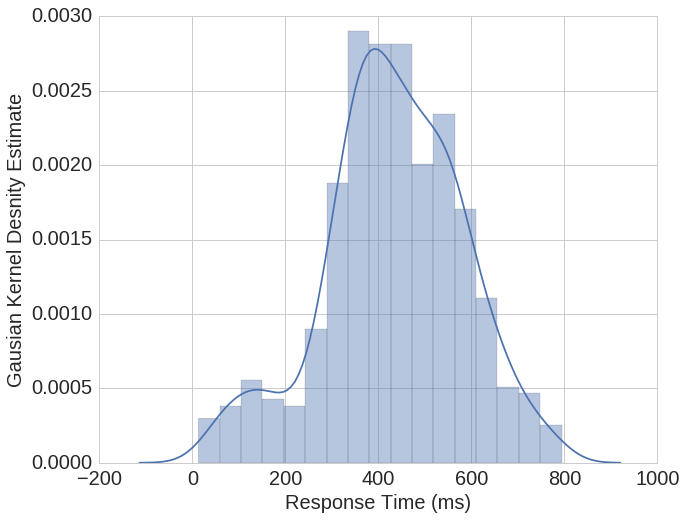

In [743]:
plt.figure(figsize=(10,8))
sns.distplot(rtpt_df_kids.rt)
plt.xlabel('Response Time (ms)', fontsize=20)
plt.ylabel('Gausian Kernel Desnity Estimate', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [740]:
rt_df = pd.read_csv('concatenated/rt_df.csv')

(0, 25)

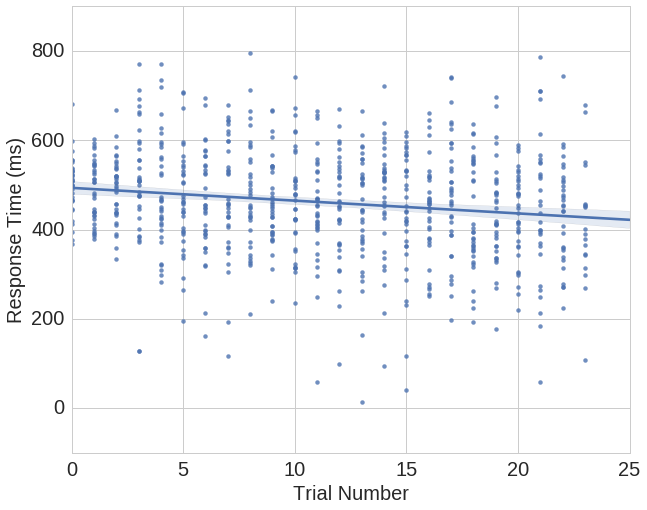

In [742]:
plt.figure(figsize=(10,8))
sns.regplot(rt_df.trial, rt_df.rt)
plt.xlabel('Trial Number', fontsize=20)
plt.ylabel('Response Time (ms)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([0,25])

In [715]:
model = sm.MixedLM.from_formula("rt ~ trial", data=rtpt_df_adults, re_formula="trial",groups=rtpt_df_adults["par"])
result = model.fit()

In [732]:
trialgroups = rtpt_df_adults.groupby('trial')

trialgroups.get_group(1)['rt'].mean()

trial_means = []
trial_std = []
for group in trialgroups.groups.keys():
    trial_means.append(trialgroups.get_group(group)['rt'].mean())
    trial_std.append(trialgroups.get_group(group)['rt'].std())

trial_std = np.array(trial_std) / float(np.sqrt(len(trial_std)))
trial_std = 1.96 * trial_std

trials_df_adults = pd.DataFrame({'rt_trial_means':trial_means, 'trial':[x for x in range(24)],
                         'std_':trial_std})

(array([ 350.,  400.,  450.,  500.,  550.,  600.]),
 <a list of 6 Text yticklabel objects>)

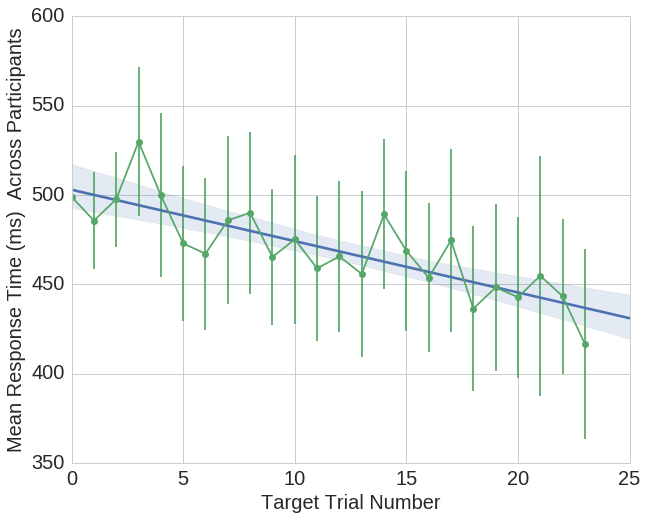

In [733]:
plt.figure(figsize=(10,8))
x = trials_df_adults.trial.values
y = trials_df_adults.rt_trial_means.values
error = trials_df_adults.std_.values
ax=sns.regplot(x,y)
ax.errorbar(x,y,error, fmt='-o')
plt.xlabel('Target Trial Number', fontsize=20)
plt.ylabel('Mean Response Time (ms)  Across Participants', fontsize=20)
plt.xlim([0,25])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [728]:
ls

add_stim.py              concatenated/          sl.ipynb
add_tsl_stims.ipynb      data/                  split_data.ipynb
adults_trials_by_rt.csv  images/                test/
analysis.ipynb           kids_trials_by_rt.csv


In [731]:
trials_df_kids.to_csv('kids_response_time_bytrialmeans.csv', index=None)

In [735]:
trials_df_adults.to_csv('adults_response_time_bytrialmeans.csv', index=None)

In [882]:
ls

add_stim.py              concatenated/          sl.ipynb
add_tsl_stims.ipynb      data/                  split_data.ipynb
adults_tsl_rt_slope.csv  images/                test/
analysis.ipynb           kids_tsl_rt_slope.csv


In [883]:
ls concatenated/

adult_rt_bytrial.csv                   kids_rt_slope.csv      tsl_rtslope.csv
adults_response_time_bytrialmeans.csv  kids_trials_by_rt.csv  tsl_table.csv
adults_trials_by_rt.csv                kids_tsl_slope_rt.csv  vsl_rtslope.csv
kids_acc_tsl.csv                       kids_vsl_slope_rt.csv  vsl_table.csv
kids_acc_vsl.csv                       rt_slope_adults.csv    vsl_trials_rt.csv
kids_response_time_bytrialmeans.csv    sl_data.csv


In [884]:
tips = sns.load_dataset('tips')

In [885]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [1009]:
tslacck = pd.read_csv('concatenated/kids_acc_tsl.csv')
vslacck = pd.read_csv('concatenated/kids_acc_vsl.csv')

In [888]:
tslacck

,par_id,acc,cond,targ
0,3332,0.59375,lang1,1C
1,3161,0.53125,lang2,3A
2,3268,1.00000,lang1,1C
3,3089,0.53125,lang1,1C
4,3067,0.93750,lang1,2C
5,3219,0.50000,lang1,2C
6,3331,0.53125,lang2,2A
7,3330,0.59375,lang1,2C
8,3224,0.56250,lang2,3A
9,3112,0.62500,lang2,2A


In [890]:
vslacck

,par_id,acc,cond,targ
0,3067,0.84375,lang1,alien9
1,3181,0.37500,lang2,alien10
2,3332,0.93750,lang2,alien4
3,3182,0.56250,lang2,alien1
4,3224,0.62500,lang2,alien4
5,3236,0.50000,lang1,alien6
6,3237,0.43750,lang1,alien12
7,3144,0.93750,lang2,alien1
8,3112,0.46875,lang1,alien9
9,3068,0.53125,lang2,alien1


In [1024]:
vacc = vslacck[['acc','par_id']]
tacc = tslacck[['acc','par_id']]

In [1025]:
vv = vacc.set_index('par_id',1).loc[tacc.par_id]

In [1026]:
tt = tacc.set_index('par_id', 1)

In [1027]:
tt

,acc
par_id,
3332,0.59375
3161,0.53125
3268,1.00000
3089,0.53125
3067,0.93750
3219,0.50000
3331,0.53125
3330,0.59375
3224,0.56250


In [1028]:
vt.columns = ['VSL','ASL']

In [1029]:
v_ = [[x for x in vt.VSL], ['VSL' for x in vt.VSL]]

In [1030]:
t_ = [[x for x in vt.ASL], ['ASL' for x in vt.ASL]]

In [1031]:
t__ = pd.DataFrame(t_).T

In [1032]:
v__ = pd.DataFrame(v_).T

In [1033]:
vt_ = pd.concat([v__, t__])

In [1034]:
vt_.columns = ['ACC', 'Task']

In [1035]:
ids = [i for x in [vv.index, tt.index] for i in x]

In [1036]:
vt_['id'] = ids

(array([0, 1]), <a list of 2 Text xticklabel objects>)

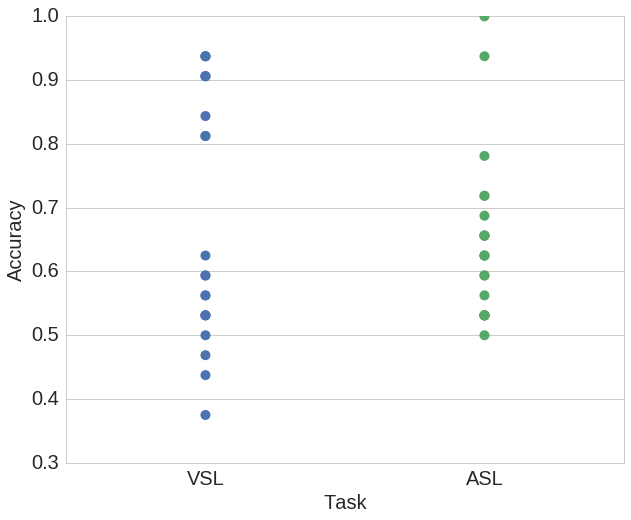

In [1037]:
plt.figure(figsize=(10,8))
sns.stripplot(x="Task", y="ACC", order=["VSL","ASL"], data=vt_, size=10)
plt.ylim([.3,1])
plt.xlabel("Task", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [943]:
ls

add_stim.py              concatenated/          sl.ipynb
add_tsl_stims.ipynb      data/                  split_data.ipynb
adults_tsl_rt_slope.csv  images/                test/
analysis.ipynb           kids_tsl_rt_slope.csv


In [944]:
adultacc=pd.read_csv('concatenated/sl_data.csv')

In [949]:
adultacc
avc = adultacc[['ID','VSL_ACC']]
atc = adultacc[['ID','TSL_ACC']]

In [980]:
atc['Task'] = ['ASL' for x in range(atc.shape[0])]
avc['Task'] = ['VSL' for x in range(avc.shape[0])]

/home/yoel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/yoel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [960]:
aaa = pd.concat([avc, atc])

In [962]:
avc.set

,ID,VSL_ACC,Task
0,SLA01,0.84375,VSL
1,SLA02,0.37500,VSL
2,SLA03,0.96875,VSL
3,SLA04,0.59375,VSL
4,SLA05,0.65625,VSL
5,SLA06,0.87500,VSL
6,SLA07,0.84375,VSL
7,SLA08,0.46875,VSL
8,SLA09,NaN,VSL
9,SLA10,0.75000,VSL


In [981]:
ids = [i for x in [avc.ID, atc.ID] for i in x]
acc = [i for x in [avc.VSL_ACC, atc.TSL_ACC] for i in x]


In [982]:
taskv = avc.Task.values
taskt = atc.Task.values



In [983]:
task = [i for x in [taskv, taskt] for i in x]

In [984]:
a=pd.DataFrame({'ID':ids, 'ACC':acc, 'Task':task})

In [985]:
a

,ACC,ID,Task
0,0.84375,SLA01,VSL
1,0.37500,SLA02,VSL
2,0.96875,SLA03,VSL
3,0.59375,SLA04,VSL
4,0.65625,SLA05,VSL
5,0.87500,SLA06,VSL
6,0.84375,SLA07,VSL
7,0.46875,SLA08,VSL
8,NaN,SLA09,VSL
9,0.75000,SLA10,VSL


(array([0, 1]), <a list of 2 Text xticklabel objects>)

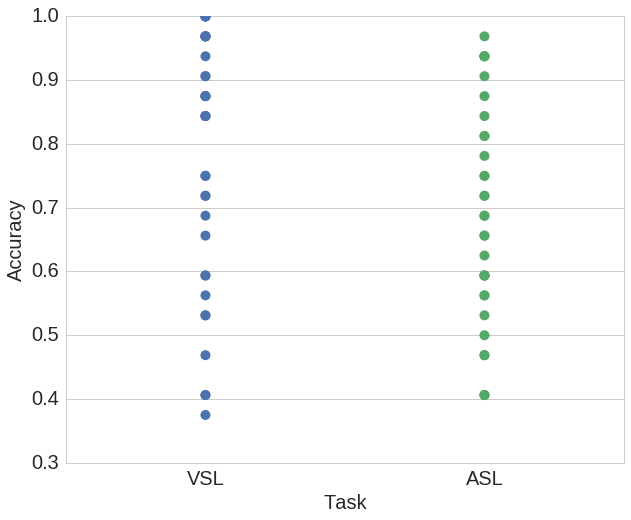

In [986]:
plt.figure(figsize=(10,8))
sns.stripplot(x="Task", y="ACC", order=["VSL","ASL"], data=a, size=10)
plt.ylim([.3,1])
plt.xlabel("Task", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

In [1043]:
d = pd.read_csv('/home/yoel/Desktop/SS_scores_adults.csv')
d.columns.values

array(['ID', 'Age', 'VSL_ACC', 'VSL_MRT', 'VSL_Slope', 'ASL_ACC',
       'ASL_MRT', 'ASL_Slope', 'KBIT_verbal_raw', 'KBIT_matrices_raw',
       'KBIT_riddles_raw', 'KBIT_total_verbal_raw',
       'KBIT_total_verbal_standard_score', 'KBIT_total_verbal_percentile',
       'KBIT_total_nonverbal_raw', 'KBIT_total_nonverbal_standard_score',
       'KBIT_total_nonverbal_percentile', 'WJIII_flu_raw',
       'WJIII_flu_time', 'WJIII_flu_standard_score',
       'WJIII_flu_percentile', 'WRMT_comp_raw', 'WRMT_comp_standard_score',
       'WRMT_comp_percentile'], dtype=object)

(100, 160)

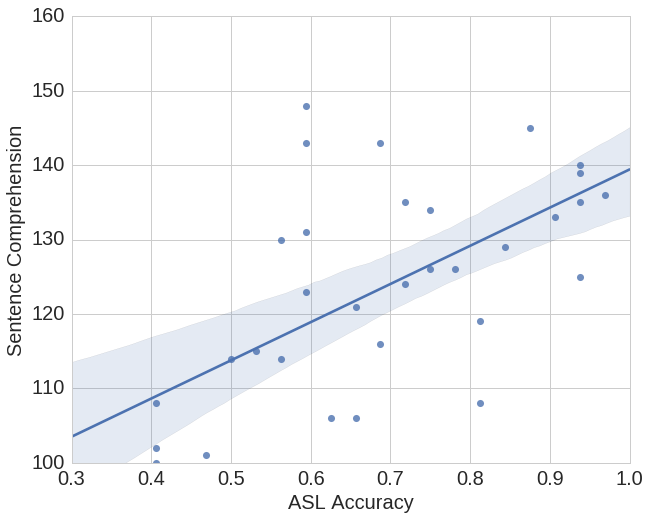

In [1081]:
plt.figure(figsize=(10,8))
sns.regplot(d.ASL_ACC, d.WJIII_flu_standard_score, scatter_kws={'s':50})
plt.xlabel("ASL Accuracy", fontsize=20)
plt.ylabel("Sentence Comprehension", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylim([100,160])
#plt.axvline(0,c='g',ls='--')
#plt.axhline(0,c='g',ls='--')

In [1074]:
?plt.axvline